In [1]:
import pandas as pd
from pathlib import Path
# from dawsonia.ml.ml import CHARSET_BASE

CHARSET_BASE = "0123456789n.-+x"
data: list[str] = [path.name.removesuffix(".png") for path in (Path.home() / "scratch/data/interim/label_old").glob("*.png")]
data.remove("temp")
data[:5]

['320032_6', '524858_9', '276231_2', '332843_3', '529931_']

In [2]:
from collections import defaultdict

def counts(word):
    c =  defaultdict(int)
    if word == "":
        c["n"] = 1
        c["<empty>"] = 1

    for char in word:
        c[char] += 1
    
    c["n"] += 1
    return c

counts("Hello")

defaultdict(int, {'H': 1, 'e': 1, 'l': 2, 'o': 1, 'n': 1})

In [3]:
from pandas import DataFrame


df: DataFrame = pd.DataFrame.from_records([counts(word) for word in (w.split("_")[1] for w in data)], index=data)


df = df.replace(float("nan"), 0)
df.head()

6  n    9    2    3  <empty>    +    1    8    .    0    7    4  \
320032_6  1.0  1  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
524858_9  0.0  1  1.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
276231_2  0.0  1  0.0  1.0  0.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
332843_3  0.0  1  0.0  0.0  1.0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
529931_   0.0  2  0.0  0.0  0.0      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            -    x    5  
320032_6  0.0  0.0  0.0  
524858_9  0.0  0.0  0.0  
276231_2  0.0  0.0  0.0  
332843_3  0.0  0.0  0.0  
529931_   0.0  0.0  0.0

In [4]:
sorted(df.columns)

['+',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '<empty>',
 'n',
 'x']

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def bar_plot_char_occurence(df, title, figsize=(6, 6), round_digits=2):
    fig, ax = plt.subplots()
    MAX = int(df.sum().max())
    print(f"{MAX = }")
    ax =  df.sum(axis="rows").sort_values().plot(kind="bar", figsize=figsize, yticks=np.arange(0, MAX, round(MAX//30, -round_digits)))
    ax.set(ylabel="number of occurences", xlabel="character", title="NOTE: 'n' is the token for both <empty> text and white space after a word")
    ax.grid(axis="y")
    fig.suptitle(title)


In [6]:
len(df)

9153

MAX = 12320


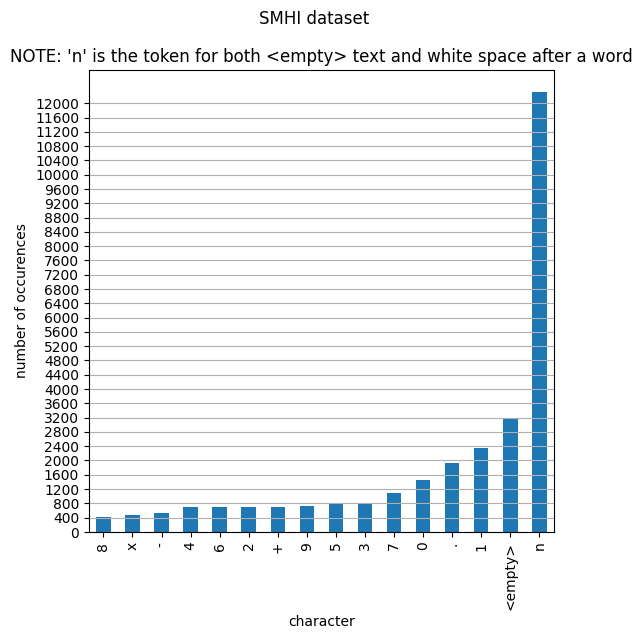

In [7]:
bar_plot_char_occurence(df, "SMHI dataset")

# DIDA dataset 12000 String digit images

In [8]:
dida = pd.read_csv(Path.home() / "scratch/data/interim/dida/DIDA_12000_String_Digit_Labels.csv", names=("image", "text"), dtype="str").set_index("image")
dida.head()

text
image      
1      1836
2      1836
3      1840
4      1840
5      1823

In [9]:
dida_df = pd.DataFrame.from_records([counts(word) for word in dida.text], index=dida.index)


dida_df = dida_df.replace(float("nan"), 0)
dida_df.head()

1    8    3    6  n    4    0    2    5    9    7
image                                                     
1      1.0  1.0  1.0  1.0  1  0.0  0.0  0.0  0.0  0.0  0.0
2      1.0  1.0  1.0  1.0  1  0.0  0.0  0.0  0.0  0.0  0.0
3      1.0  1.0  0.0  0.0  1  1.0  1.0  0.0  0.0  0.0  0.0
4      1.0  1.0  0.0  0.0  1  1.0  1.0  0.0  0.0  0.0  0.0
5      1.0  1.0  1.0  0.0  1  0.0  0.0  1.0  0.0  0.0  0.0

In [10]:
sorted(dida_df.columns)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n']

MAX = 15801


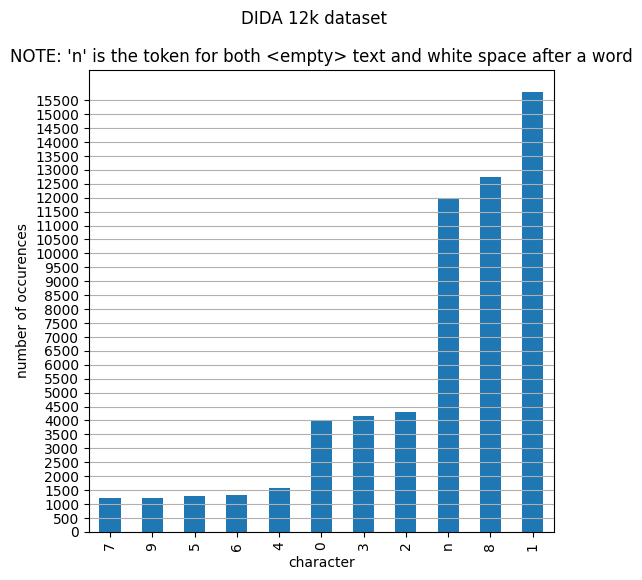

In [11]:
bar_plot_char_occurence(dida_df, "DIDA 12k dataset")

# CVL strings

In [12]:
cvl_eval_data = [path.name.removesuffix(".png") for path in (Path.home() / "scratch/data/interim/cvl-strings/cvl-strings-eval/").glob("*.png")]
cvl_eval_data[:5]

['412258-0575-17',
 '886117-0968-20',
 '120398-0291-12',
 '359910-0394-07',
 '430040-0002-15']

In [13]:
cvl_train_data = [path.name.removesuffix(".png") for path in (Path.home() / "scratch/data/interim/cvl-strings/train/").glob("*.png")]
cvl_train_data[:5]

['359910-0177-07',
 '4179248-0211-06',
 '25000-0080-08',
 '5841077-0208-04',
 '7062543-0214-01']

In [14]:
cvl_eval_df = pd.DataFrame.from_records([counts(word) for word in (w.split("-")[0] for w in cvl_eval_data)], index=cvl_eval_data)


cvl_eval_df = cvl_eval_df.replace(float("nan"), 0)
cvl_eval_df.head()

4    1    2    5    8  n    6    7    0    3    9
412258-0575-17  1.0  1.0  2.0  1.0  1.0  1  0.0  0.0  0.0  0.0  0.0
886117-0968-20  0.0  2.0  0.0  0.0  2.0  1  1.0  1.0  0.0  0.0  0.0
120398-0291-12  0.0  1.0  1.0  0.0  1.0  1  0.0  0.0  1.0  1.0  1.0
359910-0394-07  0.0  1.0  0.0  1.0  0.0  1  0.0  0.0  1.0  1.0  2.0
430040-0002-15  2.0  0.0  0.0  0.0  0.0  1  0.0  0.0  3.0  1.0  0.0

In [15]:
sorted(cvl_eval_df.columns)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n']

In [16]:
cvl_train_df = pd.DataFrame.from_records([counts(word) for word in (w.split("-")[0] for w in cvl_train_data)], index=cvl_train_data)


cvl_train_df = cvl_train_df.replace(float("nan"), 0)
cvl_train_df.head()

3    5    9    1    0  n    4    7    2    8    6
359910-0177-07   1.0  1.0  2.0  1.0  1.0  1  0.0  0.0  0.0  0.0  0.0
4179248-0211-06  0.0  0.0  1.0  1.0  0.0  1  2.0  1.0  1.0  1.0  0.0
25000-0080-08    0.0  1.0  0.0  0.0  3.0  1  0.0  0.0  1.0  0.0  0.0
5841077-0208-04  0.0  1.0  0.0  1.0  1.0  1  1.0  2.0  0.0  1.0  0.0
7062543-0214-01  1.0  1.0  0.0  0.0  1.0  1  1.0  1.0  1.0  0.0  1.0

In [17]:
sorted(cvl_train_df.columns)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'n']

MAX = 6698


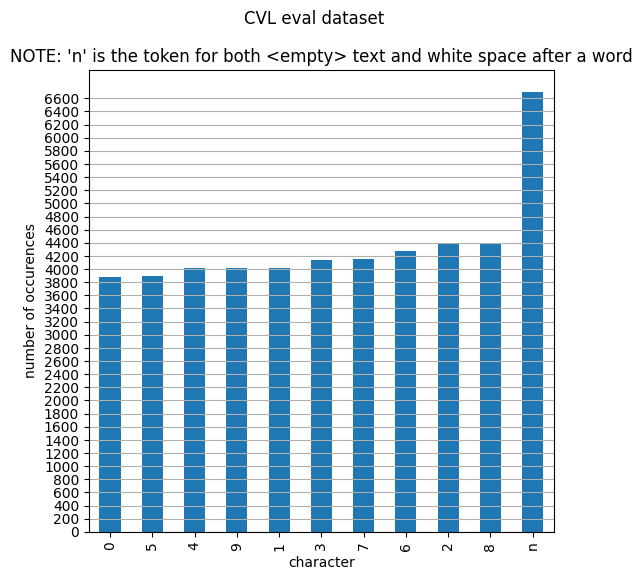

In [18]:
bar_plot_char_occurence(cvl_eval_df, "CVL eval dataset")

MAX = 1262


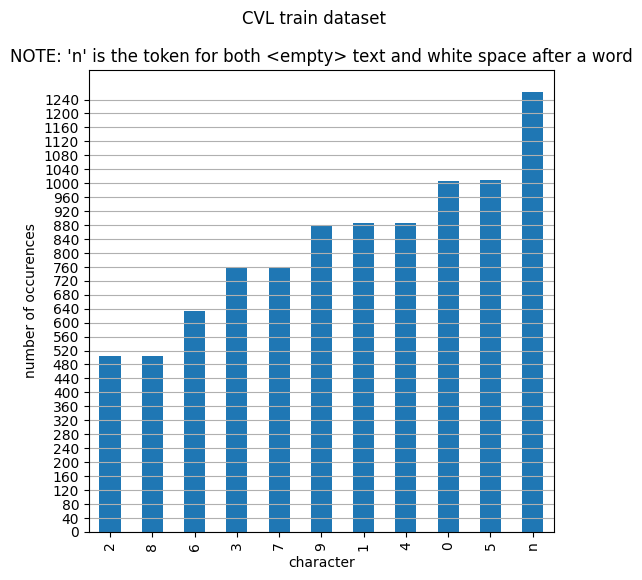

In [19]:
bar_plot_char_occurence(cvl_train_df, "CVL train dataset", round_digits=1)

# ORAND Car

While this data is also good to have, it contains some text like `3.000` annotated as `3000`:

![image](/users/mohanana/scratch/data/interim/orand-car/ORAND-CAR-2014/CAR-A/a_test_images/a_car_007009.png)